# Astrophysical Hydrodynamics 
## Numerical Assignment I
### Mahdi Najafi-Ziyazi

# Imports

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure, show

# Grid setup

In [2]:
# Define your grid here. E.g. the number of (ghost) cells, the boxsize, ...
x,rho,prs,vel,eng =np.loadtxt("sod_exact_02.txt",skiprows=1,delimiter=',',unpack=True)
x1,rho1,prs1,vel1,eng1 =np.loadtxt("sod_exact_02.txt",skiprows=1,delimiter=',',unpack=True)



## Initial conditions

In [3]:
# Define your initial conditions here.
# Initialise your state matrix Q (with density, momentum and energy), e.g. as an array of zeros with shape (3, N_CELLS)
# Use a few variables to set different ranges of the grid to the different initial conditions
Q = np.zeros((3,102))

Q[:,:51] = np.array([1,0,10/4]).reshape(3,1)
Q[:,51:] =  np.array([0.125,0,0.25]).reshape(3,1)


## Comparison settings

In [4]:
# Load analytical solution into an array with the columns:
# x, rho, P, u, e
q_exact_003 = np.genfromtxt('./sod_exact_003.txt',skip_header=1,delimiter=',')
q_exact_02 = np.genfromtxt('./sod_exact_02.txt',skip_header=1,delimiter=',')



# Define hydro functions

TEST RESULT:  [3.         4.66666667 4.        ]


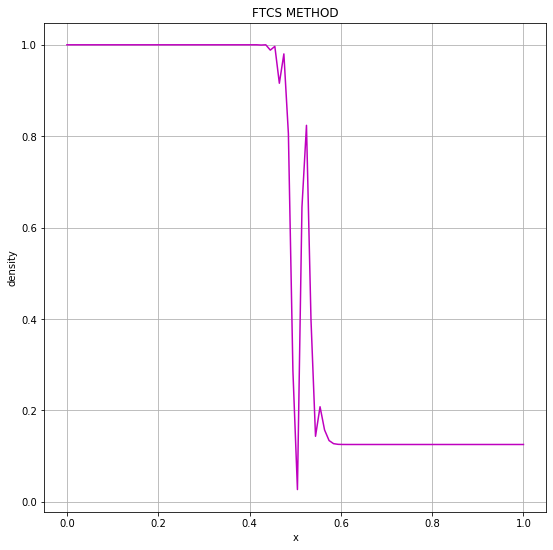

In [5]:
def flux_function(q, gamma):
    """ Define a function to determine the fluxfunction f(q) for a state vector q.
    Remember that q should contain three different quantities. """
    p = (gamma - 1)*(q[2] - 0.5*q[1]*q[1]/q[0])
    t1 = q[1]
    t2 = q[1]*q[1]/q[0] + p
    t3 = (q[2]+ p)*(q[1]/q[0])
    t = np.array([t1,t2,t3])

    return (t)

############### test ############
qt = np.array([2,3,2.5])
print("TEST RESULT: ",flux_function(qt,5/3))
#################################


T = np.arange(0,0.031,0.001)          #time iteration for sod shock tube
delta_x = 1/102                             # grid step size
delta_t = 0.001                       # time step

def update_Q_with_flux_sod_FTCS(q):
    """ Updating the state matrix using FTCS method """
    
    tempq=np.zeros(q.shape)           #Zero matrix to fill q in
    for t in T:
        
        for i in range (1,101):
            
            f_i = (1/2)*(flux_function(q[:, i],1.4)+ flux_function(q[:, i+1],1.4))
            
            f_i_1 = (1/2)*(flux_function(q[:, i],1.4) +flux_function(q[:, i-1], 1.4))
            
            tempq[:,i] = q[:,i] + (f_i_1 - f_i)*(delta_t/delta_x)
        
        tempq[:,0] = tempq[:,1]       # updating ghost cells      
        tempq[:,101] = tempq[:,100]
        q=tempq                       #updaing q after each iteration
            
       
    return (q)

################# PLOT ####################

Q_FTCS = update_Q_with_flux_sod_FTCS(Q)

fig = figure(figsize=(9,9))
frame = fig.add_subplot(1,1,1)
frame.plot(np.linspace(0,1,102), Q_FTCS[0,:], '-m')
frame.set_xlabel('x')
frame.set_ylabel('density')
frame.set_title("FTCS METHOD")
frame.grid(True)
show()



### Sod Shock Tube using Lax-Friedrichs method

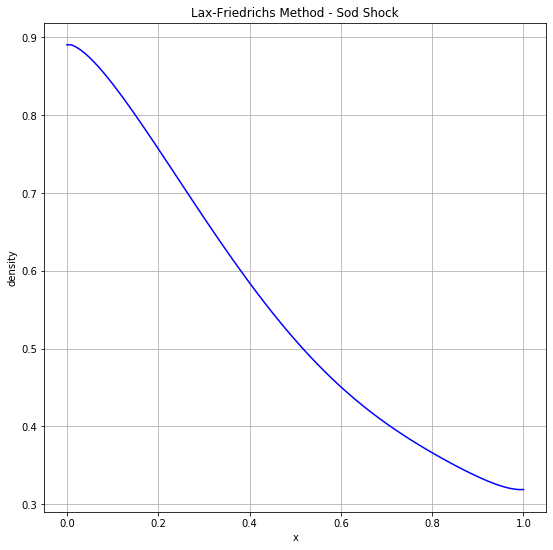

In [6]:
TT = np.arange(0,0.201,0.001)          # time iteration for Lax-friedrichs method


def update_Q_with_flux_sod_fr(q):
    """ Define a function that updates the state matrix Q with the appropriate fluxes. """
    tempq=np.zeros(q.shape)
    for t in TT:
        
        for i in range (1,101):
            
            f_i_1 = (1/2)*(flux_function(q[:, i],1.4) +flux_function(q[:, i-1], 1.4)) - 0.5*(delta_x/delta_t)*(q[:,i] - q[:,i-1])
            
            
            f_i = (1/2)*(flux_function(q[:, i],1.4)+ flux_function(q[:, i+1],1.4)) - 0.5*(delta_x/delta_t)*(q[:,i+1] - q[:,i])
            
            
            tempq[:,i] = q[:,i] + (f_i_1 - f_i)*(delta_t/delta_x)
        
        tempq[:,0] = tempq[:,1]
        tempq[:,101] = tempq[:,100]
        q=tempq     
            
       
    return (q)
            

################## PLOT ###################
Q_sod_fr = update_Q_with_flux_sod_fr(Q)

fig = figure(figsize=(9,9))
frame = fig.add_subplot(1,1,1)
frame.plot(np.linspace(0,1,102), Q_sod_fr[0,:], '-',color='blue')
frame.set_xlabel('x')
frame.set_ylabel('density')
frame.set_title("Lax-Friedrichs Method - Sod Shock")
frame.grid(True)
show()



### Sod Shock Tube using Lax-Wendroff method

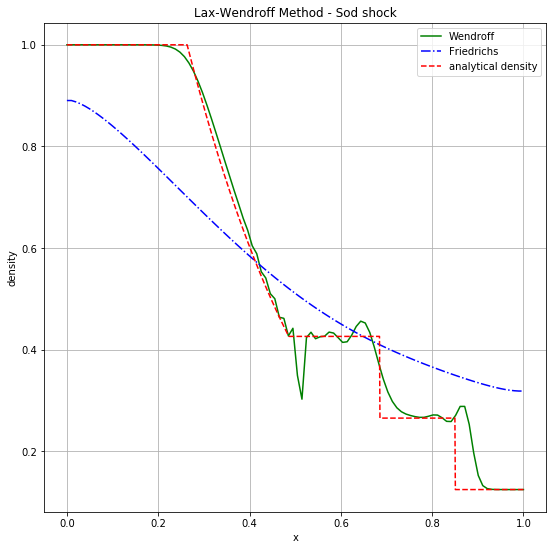

In [7]:
TT = np.arange(0,0.201,0.001)
def update_Q_with_flux_sod_wf(q):
    """ Define a function that updates the state matrix Q with the appropriate fluxes. """
    tempq=np.zeros(q.shape)       # making a temporary state matrix 
    for t in TT:
        
        for i in range (1,101):
           
            q_i_1 = 0.5*(q[:,i] + q[:,i-1]) - 0.5* (delta_t/delta_x)*(flux_function(q[:,i],1.4) - flux_function(q[:,i-1],1.4))
            q_i = 0.5*(q[:,i+1] + q[:,i]) - 0.5* (delta_t/delta_x)*(flux_function(q[:,i+1],1.4) - flux_function(q[:,i],1.4))
            f_i_1 = flux_function(q_i_1,1.4)
            f_i = flux_function(q_i, 1.4)
            tempq[:,i] = q[:,i] + (f_i_1 - f_i)*(delta_t/delta_x)
        
        tempq[:,0] = tempq[:,1]                 # updating the ghost cells
        tempq[:,101] = tempq[:,100]
        q=tempq     
            
       
    return (q)
            
    

################# PLOT #####################
    
Q_sod_wf = update_Q_with_flux_sod_wf(Q)    


fig = figure(figsize=(9,9))
frame = fig.add_subplot(1,1,1)
frame.plot(np.linspace(0,1,102), Q_sod_wf[0,:], '-',color='green', label="Wendroff")
frame.plot(np.linspace(0,1,102), Q_sod_fr[0,:], '-.',color='blue',label="Friedrichs")
frame.plot(np.linspace(0,1,len(rho)), rho, '--',color='red', label='analytical density')

frame.set_title("Lax-Wendroff Method - Sod shock")
frame.set_xlabel('x')
frame.set_ylabel('density')
frame.grid(True)
frame.legend()
show()





### Comparison

As we can see above, the curve Lax-Wendroff method is almost synced with the analytical soulution. There is a sudden dip around x = 0.5, that is where actually we have saggergated our initial values. However, I am not sure if they are related in any way. 

As one can see on the graph, the Friendrichs method has failed to delivor an appropriate density result. 

## SEDOV blast wave using LAX - Freidrichs

inidecs of cell within the given range of x:  [199, 200, 201, 202]


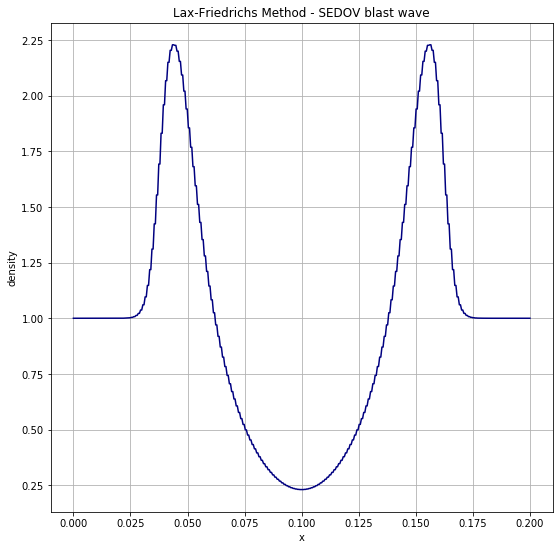

In [9]:
from matplotlib import gridspec

delta_x = 0.2/402  # grid step 

xrr = np.linspace(0,0.20,402)           #grid space

time = np.arange(0,0.05,0.0001)         #time iteration


######## finding middle cell indicies ########
j = np.arange(-2*delta_x + 0.1 ,2*delta_x + 0.1, delta_x)
k = []

for i in range(402):
    if xrr[i] > j.min() and xrr[i] < j.max():
        
        k.append(i)
        
print("inidecs of cell within the given range of x: ", k)




###################### initial condition for SEDOV blast wave #######################
Qn = np.zeros((3,402))
Qn[:,:199] =  np.array([1,0,0.00001/(5/3)]).reshape(3,1)
Qn[:,199:203] = np.array([1,0,25]).reshape(3,1)
Qn[:,203:] =   np.array([1,0,0.00001/(5/3)]).reshape(3,1)

Qn0 = np.zeros((3,402))


Qn0[:,:19] =  np.array([1,0,0.00001/(5/3)]).reshape(3,1)
Qn0[:,198:200] = np.array([1,0,25]).reshape(3,1)
Qn0[:,200:] =   np.array([1,0,0.00001/(5/3)]).reshape(3,1)
################### updating our state matrix using Lax-Friedrichs #################
def update_Q_with_flux_sedov_fr(q):
    """Using Lax-Friedrichs Method to update the state matrix for SEDOV blast wave """
    
    delta_x = 0.2/402
    delta_t = 0.0001
    for t in time:
        tempq=np.zeros(q.shape)
        
        for i in range (1,401):
            
            f_i_1 = (1/2)*(flux_function(q[:, i],5/3) +flux_function(q[:, i-1], 5/3)) - 0.5*(delta_x/delta_t)*(q[:,i] - q[:,i-1])
            
            
            f_i = (1/2)*(flux_function(q[:, i],5/3)+ flux_function(q[:, i+1],5/3)) - 0.5*(delta_x/delta_t)*(q[:,i+1] - q[:,i])
            
            
            tempq[:,i] = q[:,i] + (f_i_1 - f_i)*(delta_t/delta_x)
        
        tempq[:,0] = tempq[:,1]
        tempq[:,401] = tempq[:,400]
        q=tempq     
            
    return (q)


###################### PLOT ##############################
Q_sedov_fr = update_Q_with_flux_sedov_fr(Qn)

fig = figure(figsize=(9,9))
frame = fig.add_subplot(1,1,1)
frame.plot(np.linspace(0,0.2,402), Q_sedov_fr[0,:], '-',color='navy')
frame.set_xlabel('x')
frame.set_ylabel('density')
frame.set_title("Lax-Friedrichs Method - SEDOV blast wave")
frame.grid(True)

fig.savefig("sedov balst_fr")
show()





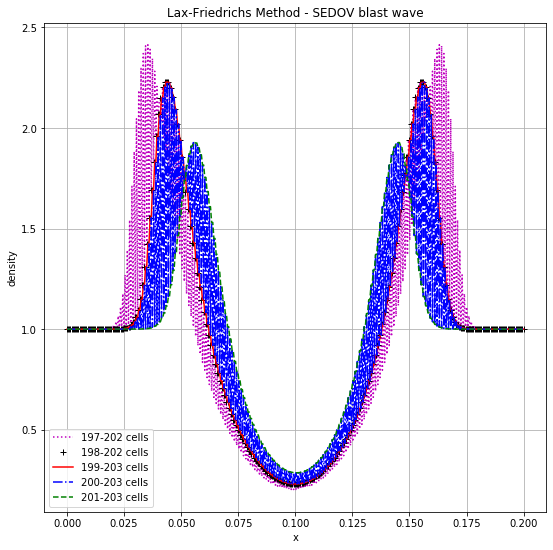

In [12]:
Qn_2 = np.zeros((3,402))
Qn_2[:,:197] =  np.array([1,0,0.00001/(5/3)]).reshape(3,1)
Qn_2[:,197:202] = np.array([1,0,25]).reshape(3,1)
Qn_2[:,202:] =   np.array([1,0,0.00001/(5/3)]).reshape(3,1)

Qn_1 = np.zeros((3,402))
Qn_1[:,:198] =  np.array([1,0,0.00001/(5/3)]).reshape(3,1)
Qn_1[:,198:202] = np.array([1,0,25]).reshape(3,1)
Qn_1[:,202:] =   np.array([1,0,0.00001/(5/3)]).reshape(3,1)
 
Qn0 = np.zeros((3,402))
Qn0[:,:199] =  np.array([1,0,0.00001/(5/3)]).reshape(3,1)
Qn0[:,199:203] = np.array([1,0,25]).reshape(3,1)
Qn0[:,203:] =   np.array([1,0,0.00001/(5/3)]).reshape(3,1)

Qn1 = np.zeros((3,402))
Qn1[:,:200] =  np.array([1,0,0.00001/(5/3)]).reshape(3,1)
Qn1[:,200:203] = np.array([1,0,25]).reshape(3,1)
Qn1[:,203:] =   np.array([1,0,0.00001/(5/3)]).reshape(3,1)

Qn2 = np.zeros((3,402))
Qn2[:,:201] =  np.array([1,0,0.00001/(5/3)]).reshape(3,1)
Qn2[:,201:203] = np.array([1,0,25]).reshape(3,1)
Qn2[:,203:] =   np.array([1,0,0.00001/(5/3)]).reshape(3,1)


Q_sedov_fr_2 = update_Q_with_flux_sedov_fr(Qn_2)
Q_sedov_fr_1 = update_Q_with_flux_sedov_fr(Qn_1)
Q_sedov_fr0 = update_Q_with_flux_sedov_fr(Qn0)
Q_sedov_fr1 = update_Q_with_flux_sedov_fr(Qn1)
Q_sedov_fr2 = update_Q_with_flux_sedov_fr(Qn2)


fig = figure(figsize=(9,9))
frame = fig.add_subplot(1,1,1)
frame.plot(np.linspace(0,0.2,402), Q_sedov_fr_2[0,:], ':',color='m', label ='197-202 cells')
frame.plot(np.linspace(0,0.2,402), Q_sedov_fr_1[0,:], '+',color='k', label ='198-202 cells')
frame.plot(np.linspace(0,0.2,402), Q_sedov_fr0[0,:], '-',color='r', label ='199-203 cells')
frame.plot(np.linspace(0,0.2,402), Q_sedov_fr1[0,:], '-.',color='b',label ='200-203 cells')
frame.plot(np.linspace(0,0.2,402), Q_sedov_fr2[0,:], '--',color='g',label ='201-203 cells')

frame.set_xlabel('x')
frame.set_ylabel('density')
frame.set_title("Lax-Friedrichs Method - SEDOV blast wave")
frame.grid(True)
frame.legend()

fig.savefig("sedov balst_fr")
show()



The same scenario would happen for the Lax-Wendroff. However, in the latter, the graph begins from the initial values of density which is a good sign but the value that has returned for the maximum density is too high. This can be seen in the function we use to update the state matrix for Lax-Wendroff, the way the initial values propogate through this function has made the final value too high.